In [24]:
from question_4 import *
import matplotlib.pyplot as plt
# from datetime import datetime

In [12]:
ERROR_COLUMN_HEADING = 'error'

The absolute value of the error is taken because the distance between the prediction and the true value matters, while the sign of the error does not.

In [13]:
def plot_and_save_to_file(circuit_no, dict_corr_coeff):
    # This line is the reason it takes about 20 seconds (on my PC).
    my_data = get_sensitivity_and_error_data(circuit_no, absolute_error=True)

    corr_coeff = my_data.corr()[ERROR_COLUMN_HEADING][SENSITIVITY_COLUMN_HEADING + ' ' + circuit_no]
    dict_corr_coeff.update({circuit_no:corr_coeff})
    
    plot = my_data.plot(
        x=SENSITIVITY_COLUMN_HEADING + ' ' + circuit_no,
        y='error',
        style='.',
        xlabel=SENSITIVITY_COLUMN_HEADING,
        ylabel='Error ε(t)',
        legend=False,
        title='Circuit ' + circuit_no
    )
    plot_file_path = Path('graphs', 'error_vs_sensitivity', circuit_no + '.png')
    plot.get_figure().savefig(plot_file_path)

Making a plot for just one circuit.

Correlation coefficient = -0.034500412686135976


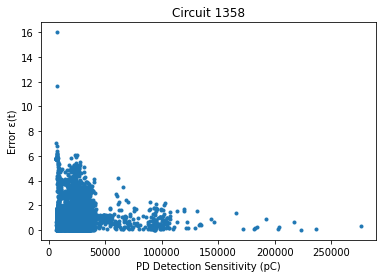

In [14]:
circuit_no = get_circuit_nos()[0]
d = {}
plot_and_save_to_file(circuit_no, d)
print('Correlation coefficient =', d[circuit_no])

# Plots for all circuits
(On my PC) the below cell takes 4.5 minutes to complete. Errors (exceptions) are encountered for circuits 2003, 20049, 20726, 2821. I have not yet explored these exceptions.

Encountered error. Circuit number = 2308
Encountered error. Circuit number = 2821
Circuit	Correlation coefficient
1358 	 -0.03445431702821133
2003 	 0.028970018294089257
20049 	 -0.3010455778085417
20726 	 -0.08791092728277983
22102 	 0.0031777257711052016
2611 	 0.052684950369858034
3410 	 0.03184799433531996
3512 	 -0.07852367221132502
3543 	 -0.0006496160726999062


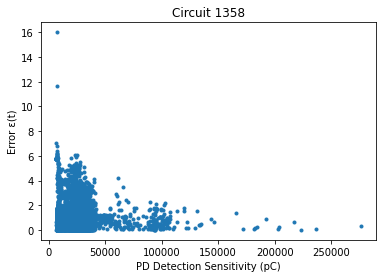

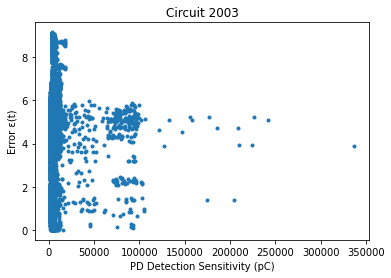

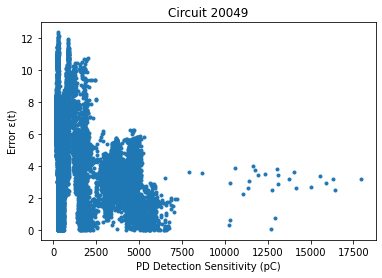

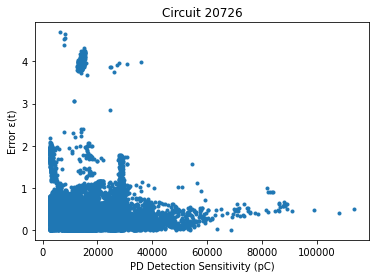

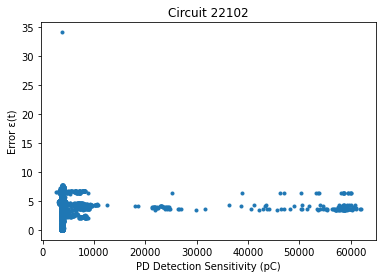

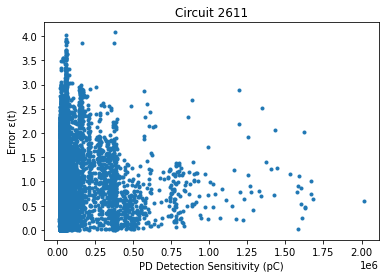

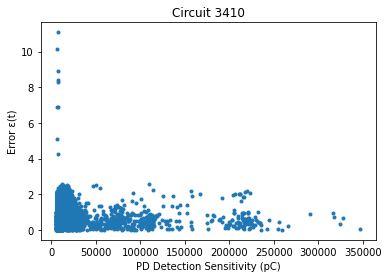

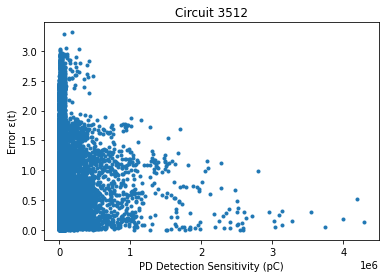

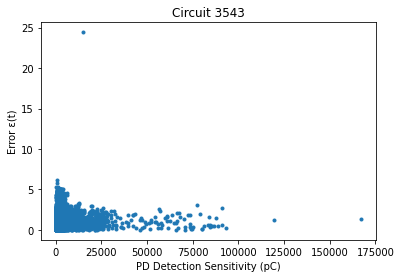

In [15]:
dict_correlation_coefficients = {}

for circuit_no in get_circuit_nos():
    try:
        plot_and_save_to_file(circuit_no, dict_correlation_coefficients)
    except:
        print('Encountered error. Circuit number =', circuit_no)

print('Circuit\tCorrelation coefficient')
for circuit_no, corr_coeff in dict_correlation_coefficients.items():
    print(circuit_no, '\t', corr_coeff)

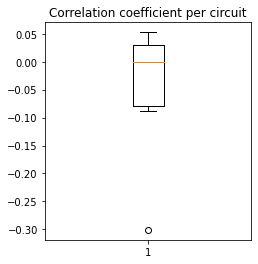

In [32]:
destination_path = Path('graphs', 'error_vs_sensitivity', 'correlation_coefficents.png')

plt.figure(figsize=(3.7,4))
plt.boxplot(list(dict_correlation_coefficients.values()))
plt.title('Correlation coefficient per circuit')
plt.savefig(destination_path)
plt.show()

Exploring the data a bit (for only one circuit).

In [35]:
circuit_no = get_circuit_nos()[0]
# "sst" = "sensitivity"
sst_data = get_sensitivity_data(circuit_no)

In [33]:
threshold = 1000
sst_data_filtered = sst_data.apply(lambda x: True if x <= threshold else False)
n_small_values = len(sst_data_filtered[sst_data_filtered == True].index)
print('Number of sensitivity values <=', threshold, 'is:', n_small_values)

Number of sensitivity values <= 1000 is: 0


In [37]:
# Unimportant.
sst_data_filtered = sst_data.apply(lambda x: True if 200000 <= x <= 250000 else False)
n_small_values = len(sst_data_filtered[sst_data_filtered == True].index)
print('Number of sensitivity values in [200000, 250000] is:', n_small_values)

Number of sensitivity values in [200000, 250000] is: 8
